In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=58316


In [2]:
H = create_hamiltonian(system), 0.1

In [3]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

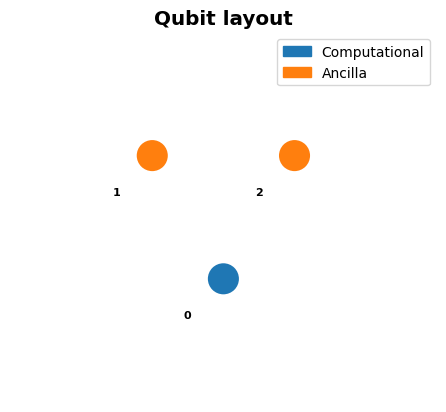

In [4]:
qubits.show_layout()

In [10]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=300, n_grad=10, theta_init=np.ones(circuit.P))

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=59161
Iteration: 0 
            Max gradient term: 0.16480527852746896 
            Current gradient: [ 0.00000000e+00 -1.38777878e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.64805279e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.17785104e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.71

In [6]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [7]:
theta_opt

array([ 0.98933102,  1.        ,  1.        ,  0.85588087,  0.99035618,
        0.98232433,  0.97598632,  0.92828171,  0.93592852,  1.00691649,
        1.0748726 ,  0.96528262,  0.98673166,  1.01045813,  1.07458684,
        0.70531867,  0.51543574,  1.02345175,  0.90067141,  0.80310552,
        0.80165326,  1.09763176,  1.04083199,  0.90855578,  0.91827779,
        0.99987703,  1.16097177,  1.02884018,  1.05482462,  0.08285383,
        1.153601  ,  1.01326498,  1.25778423,  0.96635679,  0.99998116,
        0.99840468,  0.85631092,  1.21988882,  1.01707038,  1.14633519,
        0.98049405,  1.15468922,  1.10483009,  1.11452788,  1.0995296 ,
        0.97565286,  0.86416623,  0.97941928,  0.98107492,  0.96067413,
        0.98664953,  1.07175652,  1.03774535,  0.99676302,  1.07596836,
        0.90932977,  0.75644611,  1.07975903,  0.95602462,  0.95807638,
        1.00058029,  0.75712462,  1.02136951,  0.92587358,  1.06854935,
        1.20158155,  1.0099952 ,  0.91955681,  1.19078553,  1.17

rho_rand_haar: seed=11153


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

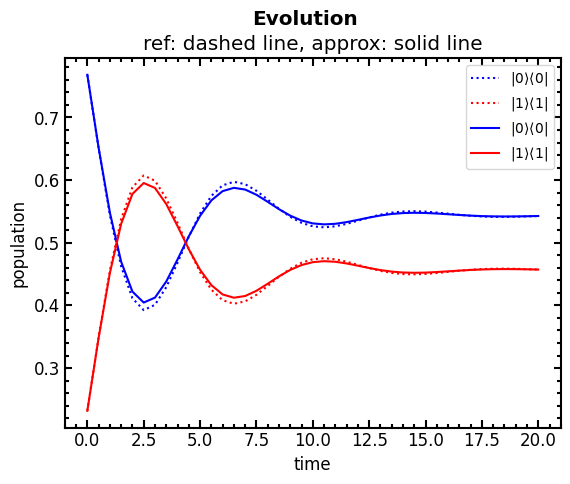

In [8]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

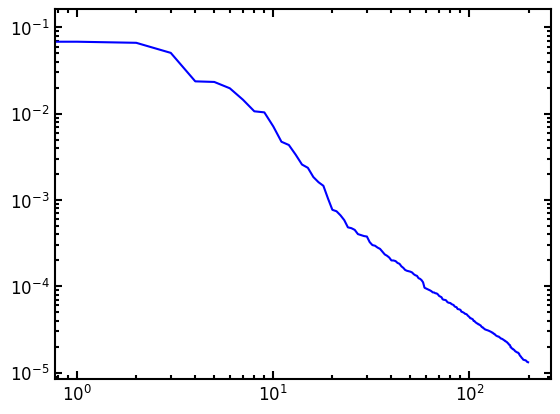

In [9]:
plt.loglog(errors)